<a href="https://colab.research.google.com/github/ImeldaPutri27/DataMining_Imel/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Booking Demand Dataset**

# **Import Library**

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

# **Business Understanding**

## **Collect Initial Data**

Dataset pada notebook ini diperoleh dari kaggle dengan judul "Hotel Booking Demand" yang telah tersimpan pada github.
https://raw.githubusercontent.com/ImeldaPutri27/hotel/f1915d0b58e9be5a44224d8b6667e45a3c2fc8c2/hotel_bookings%20(1).csv'

In [148]:
df_file = pd.read_csv('https://raw.githubusercontent.com/ImeldaPutri27/hotel/main/hotel_bookings%20(1).csv')
df_file.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [149]:
df_file

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21945,Resort Hotel,0,8,2016,March,11,11,0,2,2,...,No Deposit,171.0,NaN,0,Transient,43.0,1.0,1.0,Check-Out,2016-03-13
21946,Resort Hotel,0,8,2016,March,11,11,0,2,2,...,No Deposit,171.0,NaN,0,Transient,37.0,0.0,1.0,Check-Out,2016-03-13
21947,Resort Hotel,0,1,2016,March,11,12,0,1,2,...,No Deposit,240.0,NaN,0,Transient,64.0,1.0,0.0,Check-Out,2016-03-13
21948,Resort Hotel,0,30,2016,March,11,11,0,2,1,...,No Deposit,375.0,NaN,0,Transient-Party,25.0,0.0,0.0,Check-Out,2016-03-13


**Describe Data**

## Informasi Dasar

In [150]:
# Terdapat 21950 baris dan 32 kolom pada data ini
df_file.shape

(21950, 32)

In [151]:
# Melihat info umum tentang dataset menggunakan method info()
df_file.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21950 entries, 0 to 21949
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           21950 non-null  object 
 1   is_canceled                     21950 non-null  int64  
 2   lead_time                       21950 non-null  int64  
 3   arrival_date_year               21950 non-null  int64  
 4   arrival_date_month              21950 non-null  object 
 5   arrival_date_week_number        21950 non-null  int64  
 6   arrival_date_day_of_month       21950 non-null  int64  
 7   stays_in_weekend_nights         21950 non-null  int64  
 8   stays_in_week_nights            21950 non-null  int64  
 9   adults                          21950 non-null  int64  
 10  children                        21950 non-null  int64  
 11  babies                          21950 non-null  int64  
 12  meal                            

In [152]:
df_file.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

1. **hotel**: Nama hotel tempat pemesanan dilakukan.
   - Jumlah entri non-null: 21,950
   - Tipe data: string (object)

2. **is_canceled**: Indikator apakah pemesanan dibatalkan (1) atau tidak (0).
   - Jumlah entri non-null: 21,950
   - Tipe data: integer (int64)

3. **lead_time**: Jumlah hari antara tanggal pemesanan dan tanggal kedatangan.
   - Jumlah entri non-null: 21,950
   - Tipe data: integer (int64)

4. **arrival_date_year**: Tahun kedatangan tamu.
   - Jumlah entri non-null: 21,950
   - Tipe data: integer (int64)

5. **arrival_date_month**: Bulan kedatangan tamu.
   - Jumlah entri non-null: 21,950
   - Tipe data: string (object)

6. **arrival_date_week_number**: Nomor minggu kedatangan tamu dalam tahun.
   - Jumlah entri non-null: 21,950
   - Tipe data: integer (int64)

7. **arrival_date_day_of_month**: Hari kedatangan tamu dalam bulan.
   - Jumlah entri non-null: 21,950
   - Tipe data: integer (int64)

8. **stays_in_weekend_nights**: Jumlah malam menginap di akhir pekan.
   - Jumlah entri non-null: 21,950
   - Tipe data: integer (int64)

9. **stays_in_week_nights**: Jumlah malam menginap pada hari kerja.
   - Jumlah entri non-null: 21,950
   - Tipe data: integer (int64)

10. **adults**: Jumlah tamu dewasa.
    - Jumlah entri non-null: 21,950
    - Tipe data: integer (int64)

11. **children**: Jumlah anak.
    - Jumlah entri non-null: 21,950
    - Tipe data: integer (int64)

12. **babies**: Jumlah bayi.
    - Jumlah entri non-null: 21,950
    - Tipe data: integer (int64)

13. **meal**: Tipe paket makanan yang dipesan.
    - Jumlah entri non-null: 21,950
    - Tipe data: string (object)

14. **country**: Negara asal tamu.
    - Jumlah entri non-null: 21,495
    - Tipe data: string (object)

15. **market_segment**: Segmen pasar dari pemesanan.
    - Jumlah entri non-null: 21,950
    - Tipe data: string (object)

16. **distribution_channel**: Saluran distribusi untuk pemesanan.
    - Jumlah entri non-null: 21,950
    - Tipe data: string (object)

17. **is_repeated_guest**: Indikator apakah tamu adalah tamu berulang (1) atau tidak (0).
    - Jumlah entri non-null: 21,950
    - Tipe data: integer (int64)

18. **previous_cancellations**: Jumlah pembatalan sebelumnya oleh tamu.
    - Jumlah entri non-null: 21,950
    - Tipe data: integer (int64)

19. **previous_bookings_not_canceled**: Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh tamu.
    - Jumlah entri non-null: 21,950
    - Tipe data: integer (int64)

20. **reserved_room_type**: Tipe kamar yang dipesan oleh tamu.
    - Jumlah entri non-null: 21,950
    - Tipe data: string (object)

21. **assigned_room_type**: Tipe kamar yang sebenarnya dialokasikan kepada tamu.
    - Jumlah entri non-null: 21,950
    - Tipe data: string (object)

22. **booking_changes**: Jumlah perubahan yang dibuat pada pemesanan.
    - Jumlah entri non-null: 21,950
    - Tipe data: integer (int64)

23. **deposit_type**: Tipe deposit yang dibayarkan oleh tamu.
    - Jumlah entri non-null: 21,950
    - Tipe data: string (object)

24. **agent**: ID agen yang melakukan pemesanan.
    - Jumlah entri non-null: 17,311
    - Tipe data: float (float64)

25. **company**: ID perusahaan yang melakukan pemesanan.
    - Jumlah entri non-null: 1,842
    - Tipe data: float (float64)

26. **days_in_waiting_list**: Jumlah hari dalam daftar tunggu sebelum pemesanan dikonfirmasi.
    - Jumlah entri non-null: 21,950
    - Tipe data: integer (int64)

27. **customer_type**: Tipe pelanggan (misalnya, Transient, Contract, Group, atau Transient-Party).
    - Jumlah entri non-null: 21,950
    - Tipe data: string (object)

28. **adr**: Tarif rata-rata per kamar per malam.
    - Jumlah entri non-null: 21,949
    - Tipe data: float (float64)

29. **required_car_parking_spaces**: Jumlah tempat parkir mobil yang diminta oleh tamu.
    - Jumlah entri non-null: 21,949
    - Tipe data: float (float64)

30. **total_of_special_requests**: Jumlah permintaan khusus oleh tamu.
    - Jumlah entri non-null: 21,949
    - Tipe data: float (float64)

31. **reservation_status**: Status reservasi terakhir (Canceled, Check-Out, atau No-Show).
    - Jumlah entri non-null: 21,949
    - Tipe data: string (object)

32. **reservation_status_date**: Tanggal pembaruan status reservasi terakhir.
    - Jumlah entri non-null: 21,949
    - Tipe data: string (object)

## Informasi Lanjutan

In [153]:
df_file.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,21950.000000,21950.000000,21950.000000,21950.000000,21950.000000,21950.000000,21950.000000,21950.000000,21950.000000,21950.000000,21950.000000,21950.000000,21950.000000,21950.000000,17311.000000,1842.000000,21950.000000,21949.000000,21949.000000,21949.000000
mean,0.505011,101.529977,2015.829066,28.522551,15.629157,1.190524,3.171025,1.867426,0.133804,0.011800,0.048200,0.182916,0.210797,0.233440,214.659927,218.204126,0.718360,91.686536,0.091303,0.542530
std,0.499986,101.082346,0.746540,14.328740,8.929175,1.156315,2.475503,0.849090,0.460179,0.110075,0.214194,1.797490,1.253500,0.638202,84.537603,110.071344,8.567604,59.621463,0.289151,0.787047
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,15.000000,2015.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.000000,135.000000,0.000000,48.000000,0.000000,0.000000
50%,1.000000,69.000000,2016.000000,30.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,223.000000,0.000000,73.000000,0.000000,0.000000
75%,1.000000,168.000000,2016.000000,40.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,241.000000,281.000000,0.000000,120.600000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,531.000000,543.000000,150.000000,508.000000,2.000000,5.000000


1. is_canceled:
Jumlah data: 21.950.
Rata-rata: 0.505011.
Standar Deviasi: 0.499986.
Nilai Minimum: 0.
25%: 0.
50%: 1.
75%: 1.
Nilai Maksimum: 1.
Deskripsi: Kolom ini mungkin merupakan variabel biner yang menunjukkan apakah reservasi dibatalkan atau tidak.

2. lead_time:
Jumlah data: 21.950.
Rata-rata: 101.529977.
Standar Deviasi: 101.082346.
Nilai Minimum: 0.
25%: 15.
50%: 69.
75%: 168.
Nilai Maksimum: 737.
Deskripsi: Kolom ini mungkin merupakan jumlah hari antara tanggal reservasi dan tanggal kedatangan.

3. arrival_date_year:
Jumlah data: 21.950.
Rata-rata: 2015.829066.
Standar Deviasi: 0.746540.
Nilai Minimum: 2015.
25%: 2015.
50%: 2016.
75%: 2016.
Nilai Maksimum: 2017.
Deskripsi: Kolom ini mencantumkan tahun kedatangan tamu.

3. arrival_date_week_number:
Jumlah data: 21.950.
Rata-rata: 28.522551.
Standar Deviasi: 14.328740.
Nilai Minimum: 1.
25%: 16.
50%: 30.
75%: 40.
Nilai Maksimum: 53.
Deskripsi: Kolom ini mewakili nomor minggu dalam tahun saat kedatangan tamu.

4. arrival_date_day_of_month:
Jumlah data: 21.950.
Rata-rata: 15.629157.
Standar Deviasi: 8.929175.
Nilai Minimum: 1.
Persentil 25: 8.
Median (Persentil 50): 16.
Persentil 75: 24.
Nilai Maksimum: 31.
Deskripsi: Kolom ini mencantumkan tanggal kedatangan tamu dalam bulan.

6. stays_in_weekend_nights:
Jumlah data: 21.950.
Rata-rata: 1.190524.
Standar Deviasi: 1.156315.
Nilai Minimum: 0.
25%: 0.
50%: 1.
75%: 2.
Nilai Maksimum: 19.
Deskripsi: Kolom ini mencantumkan jumlah malam yang dihabiskan tamu di akhir pekan.

7. stays_in_week_nights:
Jumlah data: 21.950.
Rata-rata: 3.171025.
Standar Deviasi: 2.475503.
Nilai Minimum: 0.
25%: 1.
50%: 3.
75%: 5.
Nilai Maksimum: 50.

8. adults:
Jumlah data: 21.950.
Rata-rata: 1,867426.
Standar Deviasi: 0,849090.
Nilai Minimum: 0.
25%: 2.
50%: 2.
75%: 2.
Nilai Maksimum: 10.

9. children:
Jumlah data: 21.950.
Rata-rata: 0,133804.
Standar Deviasi: 0,460179.
Nilai Minimum: 0.
25%: 0.
50%: 0.
75%: 0.
Nilai Maksimum: 2.

10. babies:
Jumlah data: 21.950.
Rata-rata: 0,011800.
Standar Deviasi: 0,110075.
Nilai Minimum: 0.
25%: 0.
50%: 0.
75%: 0.
Nilai Maksimum: 2.

11. is_repeated_guest:
Jumlah data: 21.950.
Rata-rata: 0,048200.
Standar Deviasi: 0,214194.
Nilai Minimum: 0.
25%: 0.
50%: 0.
75%: 0.
Nilai Maksimum: 1.

12. previous_cancellations:
Jumlah data: 21.950.
Rata-rata: 0,182916.
Standar Deviasi: 1,797490.
Nilai Minimum: 0.
25%: 0.
50%: 0.
75%: 0.
Nilai Maksimum: 26.

13. previous_bookings_not_canceled:
Jumlah data: 21.950.
Rata-rata: 0,210797.
Standar Deviasi: 1,253500.
Nilai Minimum: 0.
25%: 0.
50%: 0.
75%: 0.
Nilai Maksimum: 30.

14. booking_changes:
Jumlah data: 21.950.
Rata-rata: 0,233440.
Standar Deviasi: 0,638202.
Nilai Minimum: 0.
25%: 0.
50%: 0.
75%: 0.
Nilai Maksimum: 17.

15. agent:
Jumlah data: 17.311 (ada beberapa nilai yang hilang).
Rata-rata: 214,659927.
Standar Deviasi: 84,537603.
Nilai Minimum: 1.
25%: 208.
50%: 240.
75%: 241.
Nilai Maksimum: 531.

16. company:
Jumlah data: 1.842 (banyak nilai yang hilang).
Rata-rata: 218,204126.
Standar Deviasi: 110,071344.
Nilai Minimum: 9.
25%: 135.
50%: 223.
75%: 281.
Nilai Maksimum: 543.

17. days_in_waiting_list:
Jumlah data: 21.950.
Rata-rata: 0,718360.
Standar Deviasi: 8,567604.
Nilai Minimum: 0.
25%: 0.
50%: 0.
75%: 0.
Nilai Maksimum: 150.

18. adr:
Jumlah data: 21.950.
Rata-rata: 91,686536.
Standar Deviasi: 59,621463.
Nilai Minimum: -6,38.
25%: 48.
50%: 73.
75%: 120,6.
Nilai Maksimum: 508.

19. required_car_parking_spaces:
Jumlah data: 21.950.
Rata-rata: 0,091303.
Standar Deviasi: 0,289151.
Nilai Minimum: 0.
25%: 0.
50%: 0.
75%: 0.
Nilai Maksimum: 2.

20. total_of_special_requests:
Jumlah data: 21.950.
Rata-rata: 0,542530.
Standar Deviasi: 0,787047.
Nilai Minimum: 0.
25%: 0.
50%: 0.
75%: 1.
Nilai Maksimum: 5.

## Informasi Statistik Deskriptif

In [154]:
# Melihat statistik deskriptif dari dataset menggunakan method describe()
print(df_file.describe())

        is_canceled     lead_time  arrival_date_year  \
count  21950.000000  21950.000000       21950.000000   
mean       0.505011    101.529977        2015.829066   
std        0.499986    101.082346           0.746540   
min        0.000000      0.000000        2015.000000   
25%        0.000000     15.000000        2015.000000   
50%        1.000000     69.000000        2016.000000   
75%        1.000000    168.000000        2016.000000   
max        1.000000    737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              21950.000000               21950.000000   
mean                  28.522551                  15.629157   
std                   14.328740                   8.929175   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   30.000000                  16.000000   
75%                   40.000000                  24.000000   

Dari hasil output diatas, diketahui nilai statistik deskriptif seperti jumlah, rata-rata, standar deviasi, nilai minimum, nilai kuartil, dan nilai maksimum untuk setiap kolom numerik pada dataset booking hotel.

# **Exploratory Data Analysis**

<ipython-input-155-525ffaec210e>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




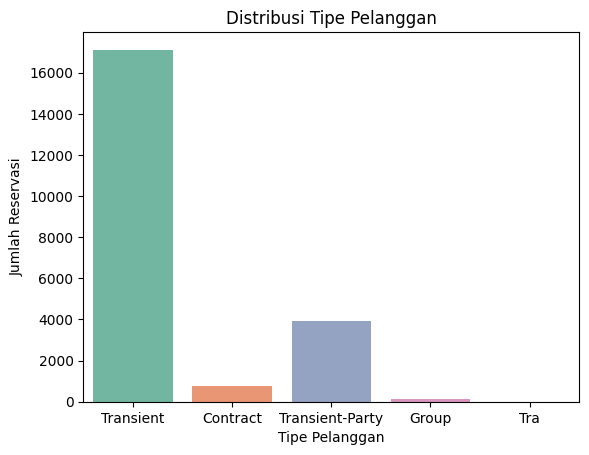

In [155]:
fig, ax = plt.subplots()

sns.countplot(x="customer_type",
              data=df_file,
              palette="Set2" )
plt.title("Distribusi Tipe Pelanggan")
plt.xlabel("Tipe Pelanggan")
plt.ylabel("Jumlah Reservasi")

plt.show()

Interpretasi:
* Dari visualisasi ini menggambarkan distribusi tipe pelanggan dalam dataset booking hotel. Setiap bar dalam plot mewakili jumlah reservasi yang dilakukan oleh tipe pelanggan tertentu, seperti "Transient", "Contract", "Group", atau "Transient-Party".
* Tipe pelanggan dengan jumlah reservasi tertinggi akan memiliki bar yang lebih tinggi dalam plot.
* visualisasi ini, manajemen hotel dapat memahami proporsi dan kontribusi dari setiap tipe pelanggan terhadap total reservasi.

Solusif (opsional):
Berdasarkan visualisasi ini, hotel dapat mengidentifikasi tipe pelanggan yang paling menguntungkan bagi mereka.Hotel juga dapat menyesuaikan strategi pemasaran dan promosi untuk menarik lebih banyak tamu dari tipe pelanggan yang kurang tertarik dengan hotel. Hotel juga dapat menawarkan program loyalitas atau diskon khusus untuk tipe pelanggan yang sering melakukan reservasi untuk membantu meningkatkan retensi pelanggan dan menghasilkan pendapatan yang lebih besar bagi hotel.

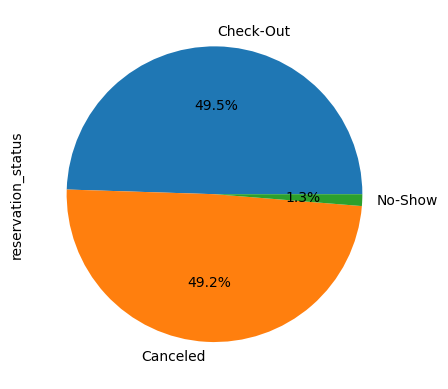

In [156]:
fig, ax = plt.subplots()

s = df_file['reservation_status'].value_counts()
s.plot(kind='pie', autopct='%1.1f%%', startangle=360)

plt.show()

Interpretasi:
* Visualisasi ini menggambarkan distribusi status reservasi dalam dataset booking hotel.
* Setiap bar dalam plot mewakili jumlah reservasi yang berada dalam status tertentu, seperti "Check-Out", "Canceled", atau "No-Show".
* Status reservasi dengan jumlah tertinggi akan memiliki bar yang lebih tinggi dalam plot.
* Dari visualisasi ini, manajemen hotel dapat memahami seberapa sering reservasi berhasil, dibatalkan, atau tidak datangnya tamu.
* Jika jumlah reservasi yang dibatalkan atau tidak hadir tinggi, hotel mungkin perlu mengevaluasi kebijakan pembatalan atau menerapkan strategi untuk mengurangi tingkat pembatalan dan tidak datang.

Solusi (opsional):
Berdasarkan visualisasi ini, hotel dapat mempertimbangkan untuk meningkatkan kebijakan pembatalan yang lebih ketat atau memberikan insentif kepada tamu untuk memastikan kedatangan mereka. Hotel juga dapat memperkuat konfirmasi reservasi dan mengingatkan kepada tamu untuk mengurangi tingkat reservasi yang tidak datang.Hotel juga dapat menawarkan promosi atau diskon khusus untuk reservasi yang tidak dibatalkan atau memiliki kebijakan pembatalan yang lebih ketat dapat menjadi solusi untuk mengurangi tingkat pembatalan.

<ipython-input-157-5350dee3cd86>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




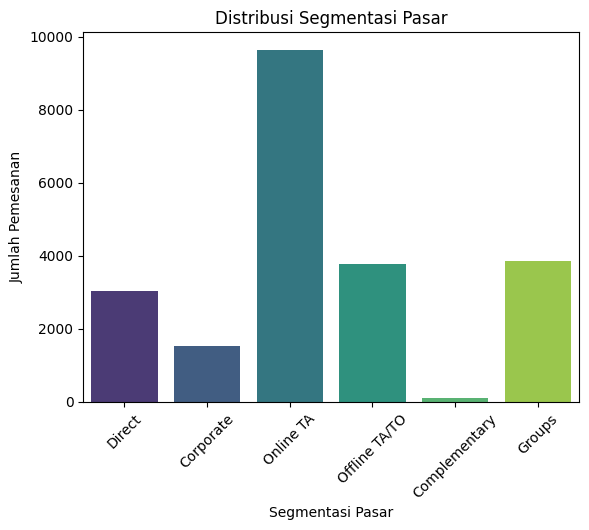

In [157]:
fig, ax = plt.subplots()

sns.countplot(x="market_segment",
              data=df_file,
              palette="viridis" )
plt.title("Distribusi Segmentasi Pasar")
plt.xlabel("Segmentasi Pasar")
plt.ylabel("Jumlah Pemesanan")
plt.xticks(rotation=45)  # Putar label sumbu x



plt.show()

Interpretasi:
* Visualisasi ini menggambarkan distribusi segmentasi pasar dalam dataset booking hotel.
* Segmentasi pasar dapat mencakup berbagai kategori seperti 'Direct', 'Corporate', 'online TA' 'Offline Travel Agents/TO', 'complementary', 'groups'.
* Dari visualisasi ini, kita dapat melihat bagaimana pembagian pemesanan hotel berdasarkan berbagai saluran pemasaran atau segmentasi pasar.
* Segmentasi pasar yang paling banyak diminati mungkin merupakan target utama pemasaran hotel, sementara segmentasi pasar yang kurang diminati mungkin memerlukan strategi pemasaran tambahan untuk menarik lebih banyak tamu.

Solusif (Potensial):
Jika terdapat segmentasi pasar yang kurang diminati, hotel dapat mempertimbangkan strategi pemasaran yang lebih agresif atau memberikan promosi khusus untuk menarik lebih banyak tamu dari segmen tersebut. Hotel juga dapat bekerja sama dengan agen perjalanan atau platform pemesanan online untuk meningkatkan visibilitas mereka di segmentasi pasar yang kurang diminati. Selain itu, memahami segmentasi pasar yang paling berhasil juga dapat membantu hotel dalam mengalokasikan sumber daya pemasaran dengan lebih efektif.
Dengan memahami distribusi segmentasi pasar melalui visualisasi ini, hotel dapat mengoptimalkan strategi pemasaran mereka, meningkatkan jumlah pemesanan, dan mengidentifikasi peluang untuk pertumbuhan bisnis yang lebih besar.

<ipython-input-158-5be90c8c5dc9>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




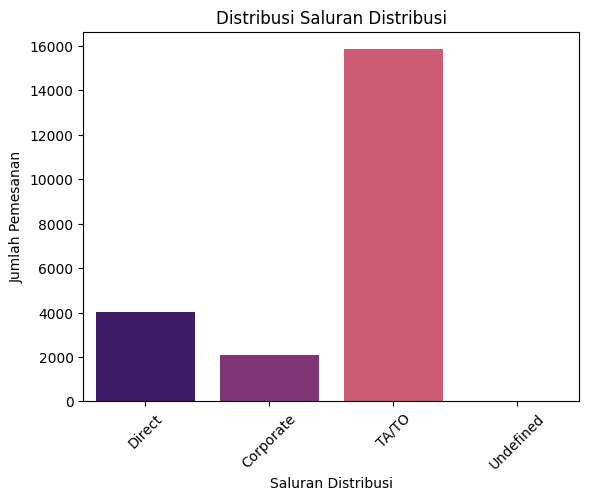

In [158]:
fig, ax = plt.subplots()

sns.countplot(x="distribution_channel",
              data=df_file,
              palette="magma" )

plt.title("Distribusi Saluran Distribusi")
plt.xlabel("Saluran Distribusi")
plt.ylabel("Jumlah Pemesanan")
plt.xticks(rotation=45)  # Putar label sumbu x

plt.show()

Interpretasi
* Visualisasi ini menggambarkan distribusi saluran distribusi dalam dataset booking hotel.
* Saluran distribusi mencakup berbagai kategori seperti 'Direct', 'Corporate', 'TA/TO', dan undefined.
* Dari visualisasi ini, kita dapat melihat bagaimana pembagian pemesanan hotel berdasarkan berbagai saluran distribusi.
* Saluran distribusi yang paling banyak digunakan mungkin merupakan saluran utama untuk pemesanan hotel, sementara saluran distribusi yang kurang digunakan mungkin memerlukan strategi pemasaran tambahan untuk meningkatkan penggunaannya.

Solusif (Potensial):Jika terdapat saluran distribusi yang kurang dapat digunakan, hotel dapat mempertimbangkan untuk promosi khusus atau kerjasama dengan agen perjalanan atau platform pemesanan online untuk meningkatkan visibilitas mereka di saluran tersebut. Hotel juga dapat meningkatkan pemasaran langsung kepada pelanggan dengan mengoptimalkan situs web mereka dan menawarkan insentif khusus untuk pemesanan langsung. Memahami saluran distribusi yang paling efektif dapat membantu hotel dalam mengalokasikan sumber daya pemasaran dengan lebih efisien dan meningkatkan penggunaan saluran distribusi yang kurang dapat dimanfaatkan.


<ipython-input-159-92470fed76fe>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




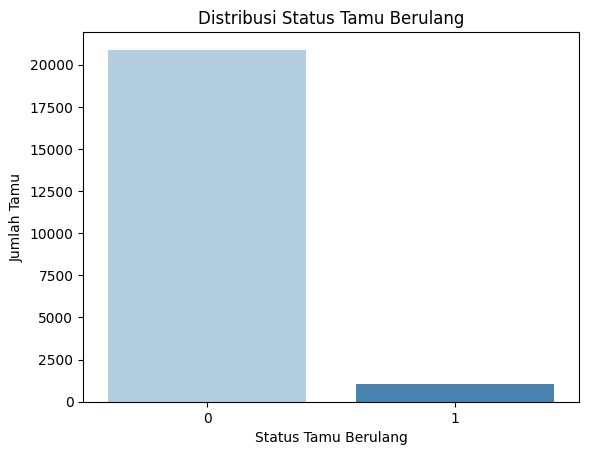

In [159]:
fig, ax = plt.subplots()

sns.countplot(x="is_repeated_guest",
              data=df_file,
              palette="Blues" )
plt.title("Distribusi Status Tamu Berulang")
plt.xlabel("Status Tamu Berulang")
plt.ylabel("Jumlah Tamu")
# plt.xticks(ticks=[0, 1], labels=["Tamu Baru", "Tamu Berulang"])


plt.show()

Visualisasi:
* Visualisasi ini menggambarkan distribusi status tamu berulang dalam dataset booking hotel.
* Jumlah tamu baru (nilai 0) dibandingkan dengan jumlah tamu berulang (nilai 1).
* Jika jumlah tamu berulang lebih tinggi, hal ini menunjukkan bahwa hotel memiliki sejumlah besar tamu yang kembali menginap di hotel tersebut.
* Jika jumlah tamu baru lebih tinggi, hotel mungkin lebih bergantung pada pemasaran untuk menarik tamu baru.

Solusif (Potensial):Jika jumlah tamu berulang rendah, hotel dapat mempertimbangkan program loyalitas atau insentif khusus untuk tamu yang kembali menginap. Hotel juga dapat meningkatkan upaya mereka dalam menjaga hubungan dengan tamu berulang, seperti dengan menyediakan pengalaman yang lebih personal dan layanan khusus. Selain itu, hotel juga dapat mengidentifikasi faktor-faktor yang mempengaruhi tamu untuk kembali menginap (seperti kualitas layanan, harga, atau fasilitas tambahan) untuk membantu hotel dalam merancang strategi retensi yang lebih efektif. Dengan memahami distribusi status tamu berulang melalui visualisasi ini, hotel dapat mengembangkan strategi pemasaran yang lebih cermat dan meningkatkan loyalitas pelanggan, yang pada akhirnya dapat meningkatkan profitabilitas dan keberlanjutan bisnis mereka.

<ipython-input-160-8f120af1750d>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




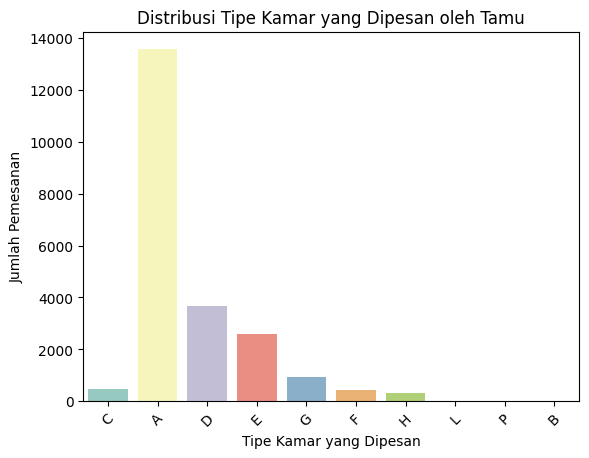

In [160]:
fig, ax = plt.subplots()

sns.countplot(x="reserved_room_type",
              data=df_file,
              palette="Set3" )
plt.title("Distribusi Tipe Kamar yang Dipesan oleh Tamu")
plt.xlabel("Tipe Kamar yang Dipesan")
plt.ylabel("Jumlah Pemesanan")
plt.xticks(rotation=45)

plt.show()

Interpretasi:
* Visualisasi ini menggambarkan distribusi tipe kamar yang dipesan oleh tamu dalam dataset booking hotel.
* Tipe kamar yang paling sering dipesan akan memiliki bar yang lebih tinggi dalam plot.
* Dari visualisasi ini, manajemen hotel dapat memahami preferensi tamu dalam memilih tipe kamar tertentu.
* Jika ada tipe kamar yang jarang atau tidak pernah dipesan, itu bisa menimbulkan pertanyaan tentang ketersediaan atau popularitas tipe kamar tersebut.

Solusi Potensial: Jika terdapat tipe kamar yang kurang diminati, hotel dapat mempertimbangkan untuk mengoptimalkan harga atau menawarkan promosi khusus untuk mendorong pemesanan pada tipe kamar tersebut. Hotel juga dapat memperhatikan alasan mengapa beberapa tipe kamar kurang diminati, mungkin ada masalah dengan fasilitas atau lokasi tipe kamar tersebut yang perlu diperbaiki.
Selain itu, mengidentifikasi tipe kamar yang paling diminati dapat membantu hotel dalam merencanakan strategi manajemen inventaris untuk memastikan ketersediaan tipe kamar yang paling diminati.

Jadi yang mempengaruhi banyaknya pemesanan hotel demand ini adalah adanya distribusi tipe pelanggan transient yang mencapai 17000 orang, reservasi mencapai 49,5%, segmentasi pasar online TA mencapai 9000,saluran distribusi TA/TO mencapai 15000, tamu baru yang datang sekitar 21000 orang, dan tipe kamar yang dipesan yaitu kamar A sekitar 15000

## Verify Data Quality

Dilakukan verifikasi kualitas data dengan cara memeriksa data berdasarkan beberapa indikator kualitas data, seperti kelengkapan data, validitas data dan duplikasi data.

### Missing Values

In [161]:
pd.DataFrame(df_file.isna().sum() /len(df_file)*100, columns=['Null Ratio %'])

,Null Ratio %
hotel,0.000000
is_canceled,0.000000
lead_time,0.000000
arrival_date_year,0.000000
arrival_date_month,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.000000
stays_in_week_nights,0.000000
adults,0.000000


jika dilihat dari presentasenya, untuk setiap kolom yang terisi nilai 0.0%, maka menandakan jika semua kolom terisi, dan tidak ada nilai yang kosong. sedangkan kolom yang terdapat nilai selain 0 maka ada nilai kosong pada kolom tersebut. kolom yang ada nilai kosong:
* country	dengan nilai kosong 2.072893
* agent	dengan nilai kosong 21.134396
* company	dengan nilai kosong 91.608200
* adr	dengan nilai kosong 0.004556
* required_car_parking_spaces	dengan nilai kosong 0.004556
* total_of_special_requests	dengan nilai kosong 0.004556
* reservation_status	dengan nilai kosong 0.004556
* reservation_status_date	dengan nilai kosong 0.004556



### **Outliers Values**

In [162]:
# Mendefinisikan fungsi untuk mendeteksi outliers dan menghitung persentase
def detect_outliers(column):
    # Convert the column to a numeric data type
    column = pd.to_numeric(column, errors='coerce')

    # Remove NaN values
    column = column.dropna()

    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Detect outliers
    outliers = (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))

    # Calculate the percentage of outliers
    percentage_outliers = outliers.sum() / len(column) * 100

    return outliers, percentage_outliers


# Loop untuk setiap kolom
for column in df_file.columns:
    outliers, percentage_outliers = detect_outliers(df_file[column])

    print(f"Kolom '{column}':")
    print(f"  - Jumlah outliers: {outliers.sum()}")
    print(f"  - Persentase kehadiran outliers: {percentage_outliers:.2f}%")
    print()

<ipython-input-162-e4f8a43a23c6>:17: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-162-e4f8a43a23c6>:17: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-162-e4f8a43a23c6>:17: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-162-e4f8a43a23c6>:17: RuntimeWarning:

invalid value encountered in scalar divide



Kolom 'hotel':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: nan%

Kolom 'is_canceled':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'lead_time':
  - Jumlah outliers: 113
  - Persentase kehadiran outliers: 0.51%

Kolom 'arrival_date_year':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'arrival_date_month':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: nan%

Kolom 'arrival_date_week_number':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'arrival_date_day_of_month':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'stays_in_weekend_nights':
  - Jumlah outliers: 115
  - Persentase kehadiran outliers: 0.52%

Kolom 'stays_in_week_nights':
  - Jumlah outliers: 144
  - Persentase kehadiran outliers: 0.66%

Kolom 'adults':
  - Jumlah outliers: 4724
  - Persentase kehadiran outliers: 21.52%

Kolom 'children':
  - Jumlah outliers: 1928
  - Persentase kehadiran outliers: 8.78%

<ipython-input-162-e4f8a43a23c6>:17: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-162-e4f8a43a23c6>:17: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-162-e4f8a43a23c6>:17: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-162-e4f8a43a23c6>:17: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-162-e4f8a43a23c6>:17: RuntimeWarning:

invalid value encountered in scalar divide



Kolom 'market_segment':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: nan%

Kolom 'distribution_channel':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: nan%

Kolom 'is_repeated_guest':
  - Jumlah outliers: 1058
  - Persentase kehadiran outliers: 4.82%

Kolom 'previous_cancellations':
  - Jumlah outliers: 1062
  - Persentase kehadiran outliers: 4.84%

Kolom 'previous_bookings_not_canceled':
  - Jumlah outliers: 1434
  - Persentase kehadiran outliers: 6.53%

Kolom 'reserved_room_type':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: nan%

Kolom 'assigned_room_type':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: nan%

Kolom 'booking_changes':
  - Jumlah outliers: 3613
  - Persentase kehadiran outliers: 16.46%

Kolom 'deposit_type':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: nan%

Kolom 'agent':
  - Jumlah outliers: 5155
  - Persentase kehadiran outliers: 29.78%

Kolom 'company':
  - Jumlah outliers: 19
  - Persentase kehadiran o

<ipython-input-162-e4f8a43a23c6>:17: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-162-e4f8a43a23c6>:17: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-162-e4f8a43a23c6>:17: RuntimeWarning:

invalid value encountered in scalar divide



### Duplicated Values

In [163]:
df_file.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21945    False
21946    False
21947    False
21948    False
21949    False
Length: 21950, dtype: bool

In [164]:
df_file[df_file.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0.0,1.0,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0.0,1.0,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0.0,0.0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0.0,3.0,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21904,Resort Hotel,0,23,2016,March,11,12,0,1,2,...,No Deposit,240.0,NaN,0,Transient,48.00,0.0,0.0,Check-Out,2016-03-13
21918,Resort Hotel,0,44,2016,March,11,12,0,1,2,...,No Deposit,240.0,NaN,0,Transient,48.00,0.0,2.0,Check-Out,2016-03-13
21922,Resort Hotel,0,23,2016,March,11,12,0,1,2,...,No Deposit,240.0,NaN,0,Transient,48.00,0.0,3.0,Check-Out,2016-03-13
21926,Resort Hotel,0,30,2016,March,11,11,0,2,1,...,No Deposit,375.0,NaN,0,Transient-Party,25.00,0.0,0.0,Check-Out,2016-03-13


dapat disimpulkan bahwa dengan hasil di atas maka banyak data yang tidak terduplikat sehingga tidak terpengaruh ke statistik deskriptifnya.

#**DATA PREPARATION**

##**Data Cleaning**

##**Construct Data**

#####Pengecekkan Missing Values

Ini adalah output dalam persentase, yang  bisa dijadikan sebagai acuan untuk pengambilan keputusan terhadap apa yang akan dilakukan pada nilai kosong.

In [165]:
pd.DataFrame(df_file.isna().sum() /len(df_file)*100)

,0
hotel,0.000000
is_canceled,0.000000
lead_time,0.000000
arrival_date_year,0.000000
arrival_date_month,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.000000
stays_in_week_nights,0.000000
adults,0.000000


Nilai Kosong Pada Kolom Company

In [166]:
df_file[df_file['company'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21945,Resort Hotel,0,8,2016,March,11,11,0,2,2,...,No Deposit,171.0,NaN,0,Transient,43.0,1.0,1.0,Check-Out,2016-03-13
21946,Resort Hotel,0,8,2016,March,11,11,0,2,2,...,No Deposit,171.0,NaN,0,Transient,37.0,0.0,1.0,Check-Out,2016-03-13
21947,Resort Hotel,0,1,2016,March,11,12,0,1,2,...,No Deposit,240.0,NaN,0,Transient,64.0,1.0,0.0,Check-Out,2016-03-13
21948,Resort Hotel,0,30,2016,March,11,11,0,2,1,...,No Deposit,375.0,NaN,0,Transient-Party,25.0,0.0,0.0,Check-Out,2016-03-13


Nilai kosong pada kolom agent

In [167]:
df_file[df_file['agent'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0.0,0.0,Check-Out,2015-07-03
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,No Deposit,NaN,110.0,0,Transient,107.42,0.0,0.0,Check-Out,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21916,Resort Hotel,0,5,2016,March,11,12,0,1,1,...,No Deposit,NaN,NaN,0,Transient,40.00,0.0,0.0,Check-Out,2016-03-13
21917,Resort Hotel,0,5,2016,March,11,12,0,1,2,...,No Deposit,NaN,NaN,0,Transient,65.00,0.0,0.0,Check-Out,2016-03-13
21936,Resort Hotel,0,4,2016,April,18,30,0,1,2,...,No Deposit,NaN,NaN,0,Transient,80.00,0.0,2.0,Check-Out,2016-05-01
21941,Resort Hotel,0,21,2016,March,11,12,0,1,2,...,No Deposit,NaN,NaN,0,Transient,56.00,0.0,1.0,Check-Out,2016-03-13


*Nilai* kosong pada kolom country

In [168]:
df_file[df_file['country'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,No Deposit,NaN,NaN,0,Transient,62.00,0.0,2.0,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,...,No Deposit,NaN,383.0,0,Transient,0.00,0.0,0.0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,...,No Deposit,NaN,204.0,0,Transient,73.00,0.0,2.0,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,...,No Deposit,NaN,NaN,0,Transient,159.00,0.0,5.0,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,...,No Deposit,NaN,457.0,0,Transient,50.00,0.0,0.0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15342,Resort Hotel,1,246,2015,September,36,5,2,5,2,...,No Deposit,96.0,NaN,0,Transient-Party,58.95,0.0,0.0,Canceled,2015-07-08
16786,Resort Hotel,0,31,2015,September,36,5,2,5,2,...,No Deposit,NaN,NaN,0,Transient,129.50,1.0,3.0,Check-Out,2015-09-12
20405,Resort Hotel,0,0,2016,January,5,27,0,1,1,...,No Deposit,NaN,NaN,0,Transient,45.00,1.0,0.0,Check-Out,2016-01-28
20467,Resort Hotel,0,0,2016,March,12,18,0,1,2,...,No Deposit,NaN,NaN,0,Transient,68.00,0.0,0.0,Check-Out,2016-03-19


In [169]:
df_file[df_file['adr'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
21949,Resort Hotel,0,1,2016,March,11,12,0,1,1,...,No Deposit,250.0,NaN,0,Tra,NaN,NaN,NaN,NaN,NaN


In [170]:
df_file[df_file['required_car_parking_spaces'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
21949,Resort Hotel,0,1,2016,March,11,12,0,1,1,...,No Deposit,250.0,NaN,0,Tra,NaN,NaN,NaN,NaN,NaN


In [171]:
df_file[df_file['total_of_special_requests'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
21949,Resort Hotel,0,1,2016,March,11,12,0,1,1,...,No Deposit,250.0,NaN,0,Tra,NaN,NaN,NaN,NaN,NaN


#####**Hapus Missing Values**


Karena persentase nilai kosong pada kolom ***Company*** lebih dari 70%, maka kolom tersebut wajib untuk dihapus

In [172]:
df_file = df_file.drop('company', axis=1)

In [173]:
df_file

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21945,Resort Hotel,0,8,2016,March,11,11,0,2,2,...,0,No Deposit,171.0,0,Transient,43.0,1.0,1.0,Check-Out,2016-03-13
21946,Resort Hotel,0,8,2016,March,11,11,0,2,2,...,0,No Deposit,171.0,0,Transient,37.0,0.0,1.0,Check-Out,2016-03-13
21947,Resort Hotel,0,1,2016,March,11,12,0,1,2,...,0,No Deposit,240.0,0,Transient,64.0,1.0,0.0,Check-Out,2016-03-13
21948,Resort Hotel,0,30,2016,March,11,11,0,2,1,...,1,No Deposit,375.0,0,Transient-Party,25.0,0.0,0.0,Check-Out,2016-03-13


#####**Imputasi Missing Values**

Untuk kolom ***agent***, perlu kita lakukan imputasi karena merupakan fitur yang relevan dalam analisis ini dan jumlah missing valuesnya < 70%. Imputasi dilakukan menggunakan nilai analisis statistik kolom ***agent***

In [174]:
df_file['agent'].dropna().describe()

count    17311.000000
mean       214.659927
std         84.537603
min          1.000000
25%        208.000000
50%        240.000000
75%        241.000000
max        531.000000
Name: agent, dtype: float64

Disini berdasarkan hasil analisis statistik, kita dapat menggunakan mean dari kolom ***Agent*** untuk imputasi nilai kosong tersebut

In [175]:
df_file['agent'] = df_file['agent'].fillna(df_file['agent'].dropna().mean())

Untuk kolom ***adr,country,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date*** akan kita lakukan yang sama seperti pada kolom ***agent***, yaitu dengan menggunakan nilai modus karena termasuk kolom kategorikal (tidak bisa dicari mean, median, dan kuartil)

In [176]:
df_file['adr'] = df_file['adr'].fillna(df_file['adr'].mode()[0])

In [177]:
df_file['required_car_parking_spaces'] = df_file['required_car_parking_spaces'].fillna(df_file['required_car_parking_spaces'].mode()[0])

In [178]:
df_file['total_of_special_requests'] = df_file['total_of_special_requests'].fillna(df_file['total_of_special_requests'].mode()[0])

#####**Pengecekkan Ulang**

In [179]:
pd.DataFrame(df_file.isna().sum() / len(df_file) * 100, columns=['Null Ratio %'])

,Null Ratio %
hotel,0.000000
is_canceled,0.000000
lead_time,0.000000
arrival_date_year,0.000000
arrival_date_month,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.000000
stays_in_week_nights,0.000000
adults,0.000000


###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [180]:
df_file[df_file.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,1,No Deposit,250.0,0,Transient,84.67,0.0,1.0,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,0,No Deposit,250.0,0,Transient,137.00,0.0,1.0,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,0,No Deposit,240.0,0,Transient,97.00,0.0,0.0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,0,No Deposit,240.0,0,Transient,109.80,0.0,3.0,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21904,Resort Hotel,0,23,2016,March,11,12,0,1,2,...,0,No Deposit,240.0,0,Transient,48.00,0.0,0.0,Check-Out,2016-03-13
21918,Resort Hotel,0,44,2016,March,11,12,0,1,2,...,0,No Deposit,240.0,0,Transient,48.00,0.0,2.0,Check-Out,2016-03-13
21922,Resort Hotel,0,23,2016,March,11,12,0,1,2,...,0,No Deposit,240.0,0,Transient,48.00,0.0,3.0,Check-Out,2016-03-13
21926,Resort Hotel,0,30,2016,March,11,11,0,2,1,...,1,No Deposit,375.0,0,Transient-Party,25.00,0.0,0.0,Check-Out,2016-03-13


#####**Hapus Nilai Duplikat**

In [181]:
df_file = df_file.drop_duplicates()

In [182]:
df_file[df_file.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


*Berdasarkan* hasil di atas, terdapat baris kosong dalam setiap kolom. Artinya, tidak ada data yang terduplikasi.

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [183]:
results = []

cols = df_file.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df_file[col].quantile(0.25)
  q3 = df_file[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df_file[(df_file[col] < lower_bound) | (df_file[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df_file))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
is_canceled,0.000000
lead_time,1.655724
arrival_date_year,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.462461
stays_in_week_nights,0.570939
adults,23.020268
children,10.802170
babies,1.444476


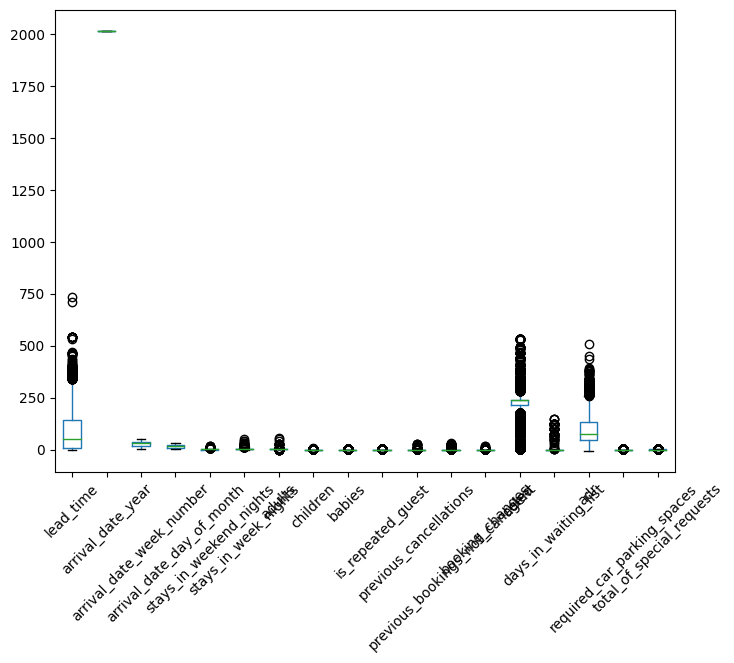

In [184]:
boxplot = df_file.drop('is_canceled', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#####**Hapus Outliers**

Melakukan penghapusan baris pada kolom "previous_bookings_not_cancelede" dan "booking_changes" untuk menanganani outliers

In [185]:
Q1 = df_file['previous_bookings_not_canceled'].quantile(0.25)
Q3 = df_file['previous_bookings_not_canceled'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_file = df_file[(df_file['previous_bookings_not_canceled'] >= lower_bound) & (df_file['previous_bookings_not_canceled'] <= upper_bound)]

In [186]:
Q1 = df_file['booking_changes'].quantile(0.25)
Q3 = df_file['booking_changes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_file = df_file[(df_file['booking_changes'] >= lower_bound) & (df_file['booking_changes'] <= upper_bound)]

#####**Imputasi Outliers**

Melakukan flooring (mengisi dengan nilai q1) dan capping (mengisi dengan nilai q3) pada kolom "is_canceled,adr,days_in_waiting_list"

In [187]:
Q1 = df_file['is_canceled'].quantile(0.25)
Q3 = df_file['is_canceled'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df_file['is_canceled']=np.where(df_file['is_canceled']>upper_whisker,upper_whisker,np.where(df_file['is_canceled']<lower_whisker,lower_whisker,df_file['is_canceled']))

In [188]:
Q1 = df_file['adr'].quantile(0.25)
Q3 = df_file['adr'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df_file['adr']=np.where(df_file['adr']>upper_whisker,upper_whisker,np.where(df_file['adr']<lower_whisker,lower_whisker,df_file['adr']))

In [189]:
Q1 = df_file['days_in_waiting_list'].quantile(0.25)
Q3 = df_file['days_in_waiting_list'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df_file['days_in_waiting_list']=np.where(df_file['days_in_waiting_list']>upper_whisker,upper_whisker,np.where(df_file['days_in_waiting_list']<lower_whisker,lower_whisker,df_file['days_in_waiting_list']))

#####Pengecekan ulang

In [190]:
results = []

cols = df_file.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df_file[col].quantile(0.25)
  q3 = df_file[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df_file[(df_file[col] < lower_bound) | (df_file[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df_file))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
is_canceled,0.000000
lead_time,1.614125
arrival_date_year,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.439527
stays_in_week_nights,0.560776
adults,17.118824
children,10.813883
babies,1.038193


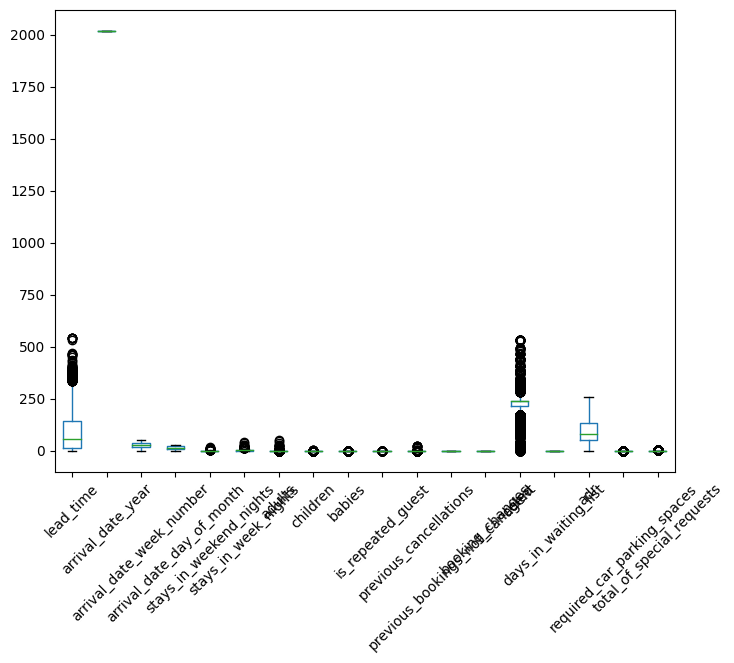

In [191]:
boxplot = df_file.drop('is_canceled', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Setelah dilakukan pengecekkan ulang, tidak ditemukan nilai yang terlalu jauh dari nilai-nilai lainnya.

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

dataset booking hotel ini tidak memerlukan rekayasa fitur karena dataset ini sudah terkategori, jadi tidak memerlukan proses manipulasi atau konstruksi tambahan

###**Pengecekkan Hasil**

In [192]:
df_file

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0.0,7,2015,July,27,1,0,1,1,...,0,No Deposit,214.659927,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0.0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.000000,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0.0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.000000,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03
6,Resort Hotel,0.0,0,2015,July,27,1,0,2,2,...,0,No Deposit,214.659927,0.0,Transient,107.0,0.0,0.0,Check-Out,2015-07-03
7,Resort Hotel,0.0,9,2015,July,27,1,0,2,2,...,0,No Deposit,303.000000,0.0,Transient,103.0,0.0,1.0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21941,Resort Hotel,0.0,21,2016,March,11,12,0,1,2,...,0,No Deposit,214.659927,0.0,Transient,56.0,0.0,1.0,Check-Out,2016-03-13
21945,Resort Hotel,0.0,8,2016,March,11,11,0,2,2,...,0,No Deposit,171.000000,0.0,Transient,43.0,1.0,1.0,Check-Out,2016-03-13
21946,Resort Hotel,0.0,8,2016,March,11,11,0,2,2,...,0,No Deposit,171.000000,0.0,Transient,37.0,0.0,1.0,Check-Out,2016-03-13
21947,Resort Hotel,0.0,1,2016,March,11,12,0,1,2,...,0,No Deposit,240.000000,0.0,Transient,64.0,1.0,0.0,Check-Out,2016-03-13


#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [193]:
df_file_corr = df_file.corr(numeric_only=True)
px.imshow(df_file_corr)

In [194]:
df_file.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0.0,7,2015,July,27,1,0,1,1,...,0,No Deposit,214.659927,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0.0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.000000,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0.0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.000000,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03
6,Resort Hotel,0.0,0,2015,July,27,1,0,2,2,...,0,No Deposit,214.659927,0.0,Transient,107.0,0.0,0.0,Check-Out,2015-07-03
7,Resort Hotel,0.0,9,2015,July,27,1,0,2,2,...,0,No Deposit,303.000000,0.0,Transient,103.0,0.0,1.0,Check-Out,2015-07-03


In [195]:
df_file = df_file.drop(['reservation_status','assigned_room_type','reservation_status_date','arrival_date_month','meal','country','customer_type','market_segment','reserved_room_type','distribution_channel'], axis=1)

Menghapus kolom **reservation_status, assigned_room_type dan reservation_status_date** karena kurang relevan. Kolom tersebut dihapus karena untuk menyederhanakan analisis dan memusatkan perhatian kepada kolom-kolom yang lebih penting.

###**Pengecekkan Hasil**

In [196]:
df_file.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
2,Resort Hotel,0.0,7,2015,27,1,0,1,1,0,...,0,0,0,0,No Deposit,214.659927,0.0,75.0,0.0,0.0
3,Resort Hotel,0.0,13,2015,27,1,0,1,1,0,...,0,0,0,0,No Deposit,304.000000,0.0,75.0,0.0,0.0
4,Resort Hotel,0.0,14,2015,27,1,0,2,2,0,...,0,0,0,0,No Deposit,240.000000,0.0,98.0,0.0,1.0
6,Resort Hotel,0.0,0,2015,27,1,0,2,2,0,...,0,0,0,0,No Deposit,214.659927,0.0,107.0,0.0,0.0
7,Resort Hotel,0.0,9,2015,27,1,0,2,2,0,...,0,0,0,0,No Deposit,303.000000,0.0,103.0,0.0,1.0


#**Data Transformation**

###**Mapping**

In [197]:
df_file['hotel'] = df_file['hotel'].map({'Resort Hotel':0})
df_file['arrival_date_year'] = df_file['arrival_date_year'].map({2015:0, 2016:1, 2017:2})
df_file['deposit_type'] = df_file['deposit_type'].map({'No Deposit':0,'Refundable':1, 'Non Refund':3})
# df_file['customer_type'] = df_file['customer_type'].map({'Transient':0,'Contract':1, 'Group':2, 'Transient-Party':3, 'NaN':4})
# df_file['market_segment'] = df_file['market_segment'].map({'Direct':0, 'Corporate':1, 'Online TA':2, 'Offline TA':3, 'NaN':5})
# df_file['distribution_channel'] = df_file['distribution_channel'].map({'Direct':0, 'Corporate':1, 'TA/TO':2})
# df_file['reserved_room_type'] = df_file['reserved_room_type'].map({'A':0, 'B':1, 'C TA':2, 'D':3, 'E':4, 'NaN':5})

In [198]:
df_file

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
2,0,0.0,7,0,27,1,0,1,1,0,...,0,0,0,0,0,214.659927,0.0,75.0,0.0,0.0
3,0,0.0,13,0,27,1,0,1,1,0,...,0,0,0,0,0,304.000000,0.0,75.0,0.0,0.0
4,0,0.0,14,0,27,1,0,2,2,0,...,0,0,0,0,0,240.000000,0.0,98.0,0.0,1.0
6,0,0.0,0,0,27,1,0,2,2,0,...,0,0,0,0,0,214.659927,0.0,107.0,0.0,0.0
7,0,0.0,9,0,27,1,0,2,2,0,...,0,0,0,0,0,303.000000,0.0,103.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21941,0,0.0,21,1,11,12,0,1,2,0,...,0,0,0,0,0,214.659927,0.0,56.0,0.0,1.0
21945,0,0.0,8,1,11,11,0,2,2,0,...,0,0,0,0,0,171.000000,0.0,43.0,1.0,1.0
21946,0,0.0,8,1,11,11,0,2,2,0,...,0,0,0,0,0,171.000000,0.0,37.0,0.0,1.0
21947,0,0.0,1,1,11,12,0,1,2,0,...,0,0,0,0,0,240.000000,0.0,64.0,1.0,0.0


Pada hasil di atas dengan menggunakan mapping yang bertujuan untuk memberikan klasifikasi numerik yang dapat diproses oleh model. Berikut adalah penjelasannya :

1.  Klasifikasi numerik kepada setiap tahun kedatangan guna memudahkan analisis data. Dalam hal ini bulan kedatangan diubah menjadi nilai numerik, di mana '2015' diwakili oleh 0, '2016' diwakili oleh 1, dan '2017' diwakili oleh 2. Ini mungkin untuk memfasilitasi analisis berbasis bulan.

2. Klasifikasi numerik kepada setiap deposit dibayar atau tidak guna memudahkan analisis data. di mana 'No Deposit' diwakili oleh 0, 'Refundable' diwakili oleh 1, dan 'Non Refund' diwakili 3. Ini mungkin untuk mengkodekan apakah deposit dibayarkan atau tidak.

3. Klasifikasi numerik kepada setiap jenis pelanggan guna memudahkan analisis data.di mana 'Transient' diwakili oleh 0,'Contract':1, 'Group':2 dan 'Transient' diwakili oleh 3. Ini mungkin digunakan untuk membedakan jenis-jenis pelanggan.

###**Encoding**

###**Pengecekkan Hasil**

In [199]:
df_file

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
2,0,0.0,7,0,27,1,0,1,1,0,...,0,0,0,0,0,214.659927,0.0,75.0,0.0,0.0
3,0,0.0,13,0,27,1,0,1,1,0,...,0,0,0,0,0,304.000000,0.0,75.0,0.0,0.0
4,0,0.0,14,0,27,1,0,2,2,0,...,0,0,0,0,0,240.000000,0.0,98.0,0.0,1.0
6,0,0.0,0,0,27,1,0,2,2,0,...,0,0,0,0,0,214.659927,0.0,107.0,0.0,0.0
7,0,0.0,9,0,27,1,0,2,2,0,...,0,0,0,0,0,303.000000,0.0,103.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21941,0,0.0,21,1,11,12,0,1,2,0,...,0,0,0,0,0,214.659927,0.0,56.0,0.0,1.0
21945,0,0.0,8,1,11,11,0,2,2,0,...,0,0,0,0,0,171.000000,0.0,43.0,1.0,1.0
21946,0,0.0,8,1,11,11,0,2,2,0,...,0,0,0,0,0,171.000000,0.0,37.0,0.0,1.0
21947,0,0.0,1,1,11,12,0,1,2,0,...,0,0,0,0,0,240.000000,0.0,64.0,1.0,0.0


Encoding digunakan untuk mengubah setiap kolom kategorikal menjadi satu set kolom biner (0 atau 1). Kolom baru ini akan mewakili setiap nilai unik dalam variabel kategorikal asli. Jika suatu baris memiliki nilai tertentu dalam variabel kategorikal, maka kolom yang sesuai dengan nilai tersebut akan memiliki nilai 1, sedangkan kolom-kolom lainnya akan memiliki nilai 0.

In [205]:
df_file.to_csv('Data Cleaned.csv',index=False)

#**Import Library dan Resource yang akan digunakan**

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#####*Library untuk Splitting Data*

In [207]:
from sklearn.model_selection import train_test_split

#####**Library untuk Normalisasi Data**

In [208]:
from sklearn.preprocessing import MinMaxScaler

#####*Library untuk Build Model*

In [209]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

#**Inisiasi Variabel untuk menyimpan  DataFrame**

In [210]:
df = pd.read_csv('https://raw.githubusercontent.com/ImeldaPutri27/datacleaning_imel/main/Data%20Cleaned%20(4).csv')

In [211]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,0.0,7,0,27,1,0,1,1,0,...,0,0,0,0,0,214.659927,0.0,75.0,0.0,0.0
1,0,0.0,13,0,27,1,0,1,1,0,...,0,0,0,0,0,304.000000,0.0,75.0,0.0,0.0
2,0,0.0,14,0,27,1,0,2,2,0,...,0,0,0,0,0,240.000000,0.0,98.0,0.0,1.0
3,0,0.0,0,0,27,1,0,2,2,0,...,0,0,0,0,0,214.659927,0.0,107.0,0.0,0.0
4,0,0.0,9,0,27,1,0,2,2,0,...,0,0,0,0,0,303.000000,0.0,103.0,0.0,1.0


#**Modelling Predict**

pada dataset ini saya menggunakan Metode prediksi bertujuan untuk memprediksi nilai variabel target berdasarkan variabel input yang diberikan. Jadi, untuk menganalisis dataset kualitas anggur merah, lebih tepat menggunakan metode prediksi untuk menghasilkan model yang dapat memprediksi kualitas anggur berdasarkan atribut-atribut yang ada.

###**Pre-Processing**

#####**Split Data**

In [212]:
x = df.drop('arrival_date_day_of_month', axis=1)
y = df['arrival_date_day_of_month']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

jadi pada dataset saya ini karena baris nya kurang dari 1000 maka saya menggunakan rasio 7:3 dan test_size nya menggunakan 0.3 dan split data berguna untuk menghindari overfitting dan mengevaluasi kinerja model secara obyektif

In [213]:
x_train

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
11460,0,0.0,2,0,50,0,2,2,0,0,0,0,0,0,0,240.000000,0.0,48.00,0.0,1.0
11901,0,0.0,27,1,2,2,3,2,0,0,0,0,0,0,0,314.000000,0.0,26.10,0.0,0.0
440,0,0.0,44,0,30,2,2,2,0,0,0,0,0,0,0,214.659927,0.0,92.00,0.0,0.0
2018,0,0.0,4,0,43,0,1,2,0,0,0,0,0,0,0,240.000000,0.0,77.00,0.0,1.0
11144,0,0.0,0,0,48,0,1,1,0,0,0,0,0,0,0,240.000000,0.0,40.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0,0.0,0,1,3,0,1,1,0,0,0,0,0,0,0,240.000000,0.0,39.00,0.0,0.0
5191,0,1.0,42,1,39,0,1,2,0,0,0,0,0,0,0,240.000000,0.0,109.00,0.0,1.0
5390,0,1.0,14,1,43,2,2,2,0,0,0,0,0,0,0,240.000000,0.0,60.00,0.0,1.0
860,0,1.0,128,0,33,2,8,1,0,0,0,0,0,0,0,6.000000,0.0,90.95,0.0,1.0


#####**Normalisasi Data**

In [214]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

jadi pada syntax ini ketika dijalankan kita mendapatkan dua set data yang telah dinormalisasi: x_train_norm (data pelatihan yang telah dinormalisasi) dan x_test_norm (data pengujian yang telah dinormalisasi). Data ini siap digunakan untuk melatih dan menguji model machine learning. Dengan melakukan penskalaan fitur, kita dapat meningkatkan kinerja model, terutama untuk algoritma-algoritma yang sensitif terhadap skala fitur, seperti algoritma jarak-berbasis (distance-based algorithms) dan algoritma gradien (gradient-based algorithms).

In [143]:
x_train_norm

array([[       nan, 0.        , 0.00369004, ..., 0.18428137, 0.        ,
        0.2       ],
       [       nan, 0.        , 0.0498155 , ..., 0.100203  , 0.        ,
        0.        ],
       [       nan, 0.        , 0.08118081, ..., 0.35320597, 0.        ,
        0.        ],
       ...,
       [       nan, 1.        , 0.02583026, ..., 0.23035172, 0.        ,
        0.2       ],
       [       nan, 1.        , 0.23616236, ..., 0.34917481, 0.        ,
        0.2       ],
       [       nan, 1.        , 0.5701107 , ..., 0.33861703, 0.        ,
        0.2       ]])

In [215]:
x_test

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
7443,0,1.0,298,2,24,3,7,2,0,0,0,0,0,0,0,240.0,0.0,107.10,0.0,0.0
8156,0,1.0,203,2,30,2,9,2,0,0,0,0,0,0,0,240.0,0.0,156.34,0.0,1.0
5163,0,0.0,223,1,39,2,5,2,0,0,0,0,0,0,0,143.0,0.0,68.60,0.0,1.0
12652,0,0.0,0,1,8,0,1,1,0,0,0,0,0,0,0,240.0,0.0,43.00,0.0,0.0
9513,0,0.0,4,0,32,1,0,2,1,0,0,0,0,0,0,241.0,0.0,143.34,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,0,0.0,200,1,18,1,4,2,0,0,0,0,0,0,0,240.0,0.0,79.20,0.0,2.0
10064,0,1.0,216,0,41,2,5,2,0,0,0,1,0,0,0,171.0,0.0,57.60,0.0,0.0
2367,0,1.0,87,0,49,2,5,2,0,0,0,0,0,0,0,240.0,0.0,50.40,0.0,1.0
7974,0,1.0,51,2,29,2,0,1,0,0,0,0,0,0,0,75.0,0.0,0.00,0.0,2.0


In [216]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,0.0,7,0,27,1,0,1,1,0,...,0,0,0,0,0,214.659927,0.0,75.0,0.0,0.0
1,0,0.0,13,0,27,1,0,1,1,0,...,0,0,0,0,0,304.000000,0.0,75.0,0.0,0.0
2,0,0.0,14,0,27,1,0,2,2,0,...,0,0,0,0,0,240.000000,0.0,98.0,0.0,1.0
3,0,0.0,0,0,27,1,0,2,2,0,...,0,0,0,0,0,214.659927,0.0,107.0,0.0,0.0
4,0,0.0,9,0,27,1,0,2,2,0,...,0,0,0,0,0,303.000000,0.0,103.0,0.0,1.0


In [217]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

###**Build and Train Model**

#####**Gaussian Naive Bayes**

In [218]:
gnb = GaussianNB()

gnb.fit(x_train_norm,y_train)

GaussianNB()


Setelah menjalankan syntax ini, model Gaussian Naive Bayes (GNB) akan dilatih menggunakan data pelatihan yang telah dinormalisasi (x_train_norm) dan label-label kategori yang baru saja dibuat (y_train_categorical). Model ini akan siap untuk digunakan untuk melakukan prediksi terhadap data baru

#####**K-Nearest Neighbor**

In [219]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

etelah menjalankan syntax ini, model K-Nearest Neighbors (KNN) akan dilatih menggunakan data pelatihan yang telah dinormalisasi (x_train_norm) dan label-label kategori yang baru saja dibuat (y_train_categorical). Model ini akan siap untuk digunakan untuk melakukan prediksi terhadap data baru.

#####**Decision Tree**

In [220]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()


Setelah menjalankan syntax ini, model Decision Tree Classifier (DTC) akan dilatih menggunakan data pelatihan yang telah dinormalisasi (x_train_norm) dan label-label kategori yang baru saja dibuat (y_train_categorical). Model ini akan siap untuk digunakan untuk melakukan prediksi terhadap data baru

###**Begins and Compare Predict**

In [221]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)


Setelah menjalankan syntax ini, kita akan mendapatkan tiga set prediksi: gnb_pred, knn_pred, dan dtc_pred. Setiap set prediksi ini akan berisi prediksi label dari data pengujian yang dilakukan oleh masing-masing model yang telah dilatih sebelumnya. Prediksi-prediksi ini dapat digunakan untuk mengevaluasi kinerja model dan melakukan analisis lebih lanjut terhadap data.

In [222]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)


Setelah menjalankan syntax ini, kita akan mendapatkan DataFrame combined_data yang berisi data pengujian, label sebenarnya (y_test), serta hasil prediksi dari tiga model yang berbeda. DataFrame ini dapat digunakan untuk melakukan analisis lebih lanjut, mengevaluasi kinerja model, dan membandingkan hasil prediksi antar model.

In [223]:
combined_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date_day_of_month,gnb_prediction,knn_prediction,dtc_prediction
0,0,1.0,298,2,24,3,7,2,0,0,...,0,240.0,0.0,107.10,0.0,0.0,12,13,10,17
1,0,1.0,203,2,30,2,9,2,0,0,...,0,240.0,0.0,156.34,0.0,1.0,26,13,1,28
2,0,0.0,223,1,39,2,5,2,0,0,...,0,143.0,0.0,68.60,0.0,1.0,20,13,2,21
3,0,0.0,0,1,8,0,1,1,0,0,...,0,240.0,0.0,43.00,0.0,0.0,17,13,18,17
4,0,0.0,4,0,32,1,0,2,1,0,...,0,241.0,0.0,143.34,0.0,2.0,3,13,27,3


In [233]:
combined_data.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date_day_of_month,gnb_prediction,knn_prediction,dtc_prediction
1782,0,1.0,117,0,32,2,6,2,0,0,...,0,240.000000,0.0,166.0,0.0,0.0,5,13,9,3
353,0,0.0,30,0,28,2,5,2,0,0,...,0,240.000000,0.0,155.0,0.0,0.0,6,13,5,8
3390,0,0.0,77,0,33,2,3,2,0,0,...,0,96.000000,0.0,135.0,0.0,1.0,15,13,6,15
1591,0,0.0,10,1,4,0,2,2,0,0,...,0,214.659927,0.0,52.8,0.0,0.0,22,13,23,22
1654,0,0.0,1,1,10,0,1,2,0,0,...,0,214.659927,0.0,55.0,0.0,0.0,5,13,2,2
157,0,0.0,4,0,49,0,1,2,0,0,...,0,240.000000,0.0,68.0,0.0,1.0,5,23,3,1
2324,0,0.0,0,0,52,1,0,2,0,0,...,0,214.659927,0.0,69.0,1.0,0.0,21,23,9,26
3928,0,0.0,15,0,45,0,2,2,0,0,...,0,115.000000,0.0,26.1,0.0,0.0,6,13,19,3
256,0,0.0,225,1,22,1,1,2,0,0,...,0,298.000000,0.0,85.0,0.0,0.0,28,13,28,28
2606,0,0.0,20,0,40,2,5,2,0,0,...,0,171.000000,0.0,44.5,0.0,0.0,2,23,30,2


#**Modelling Associate**

pendekatan dalam analisis data yang bertujuan untuk mengidentifikasi pola atau asosiasi antara berbagai variabel atau item dalam dataset. Tujuannya adalah untuk menemukan hubungan atau ketergantungan antara entitas dalam data, seperti produk yang sering dibeli bersama atau gejala yang berkaitan dalam dataset medis.

###**Pre-Processing**

#####**Adjusment**

In [224]:
x_final = df.drop("arrival_date_day_of_month", axis=1)

#####**Normalisasi Data**

In [225]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

x_final_norm akan berisi DataFrame yang sama dengan x_final, tetapi fitur-fiturnya telah dinormalisasi menggunakan skala Min-Max.

In [226]:
x_final

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,0.0,7,0,27,0,1,1,0,0,0,0,0,0,0,214.659927,0.0,75.0,0.0,0.0
1,0,0.0,13,0,27,0,1,1,0,0,0,0,0,0,0,304.000000,0.0,75.0,0.0,0.0
2,0,0.0,14,0,27,0,2,2,0,0,0,0,0,0,0,240.000000,0.0,98.0,0.0,1.0
3,0,0.0,0,0,27,0,2,2,0,0,0,0,0,0,0,214.659927,0.0,107.0,0.0,0.0
4,0,0.0,9,0,27,0,2,2,0,0,0,0,0,0,0,303.000000,0.0,103.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13191,0,0.0,21,1,11,0,1,2,0,0,0,0,0,0,0,214.659927,0.0,56.0,0.0,1.0
13192,0,0.0,8,1,11,0,2,2,0,0,0,0,0,0,0,171.000000,0.0,43.0,1.0,1.0
13193,0,0.0,8,1,11,0,2,2,0,1,0,0,0,0,0,171.000000,0.0,37.0,0.0,1.0
13194,0,0.0,1,1,11,0,1,2,0,0,0,0,0,0,0,240.000000,0.0,64.0,1.0,0.0


#####**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

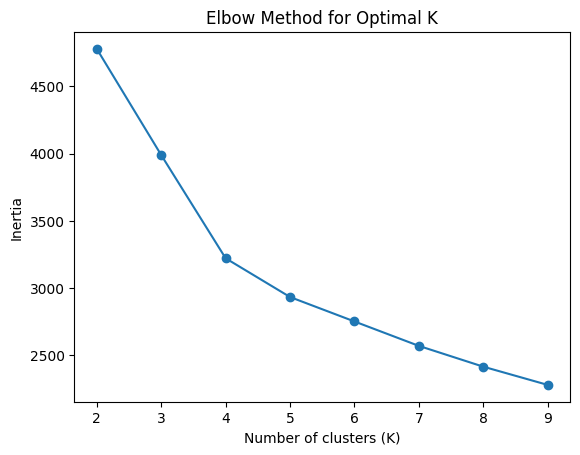

In [227]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

 untuk membantu menemukan jumlah optimal klaster dengan mengidentifikasi titik "siku" pada grafik inertia versus jumlah klaster. Pada titik tersebut, penurunan inertia mulai melambat secara signifikan. Jumlah klaster di titik tersebut sering dipilih sebagai jumlah klaster yang optimal untuk pengelompokan data.

###**Build Model**

#####**K-Means**

In [228]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

#####**Hierarchical Clustering**

In [229]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

###**Begins and Compare Clusters**

In [230]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [231]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

In [232]:
combined_data_assoc.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kmeans_cluster,hierarchy_cluster
0,0,0.0,7,0,27,0,1,1,0,0,...,0,0,0,214.659927,0.0,75.0,0.0,0.0,2,3
1,0,0.0,13,0,27,0,1,1,0,0,...,0,0,0,304.000000,0.0,75.0,0.0,0.0,2,3
2,0,0.0,14,0,27,0,2,2,0,0,...,0,0,0,240.000000,0.0,98.0,0.0,1.0,2,3
3,0,0.0,0,0,27,0,2,2,0,0,...,0,0,0,214.659927,0.0,107.0,0.0,0.0,2,3
4,0,0.0,9,0,27,0,2,2,0,0,...,0,0,0,303.000000,0.0,103.0,0.0,1.0,2,3
